# Body Joint Coordinates embodied by a Stick Figure

In this notebook we are loading the sequences of coordinates we predicted using our previous notebook (Generating New Sequences of Movement) and moving a stick figure with them.

In [46]:
# Importing required libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [47]:
# Reading Predictions from pred_values.csv
df = pd.read_csv('pred_values.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,330.000000,128.000000,340.000000,134.000000,312.000000,136.000000,368.000000,156.000000,301.000000,...,314.000000,216.000000,329.000000,278.000000,310.000000,274.000000,335.000000,318.000000,313.000000,318.000000
1,1,-208.718153,-14.155986,58.528966,-320.885988,-154.216185,-59.165028,236.895970,-156.153579,-38.531714,...,-1.709518,65.187399,78.889102,-131.715214,193.414528,63.284792,-340.961219,-90.571909,-204.504579,236.469771
2,2,10.937537,-502.202676,-243.151840,12.911694,110.125287,-54.490893,9.147340,65.375676,-265.553591,...,-115.617310,52.377979,77.530488,-44.383710,-196.428819,136.298436,245.269822,-80.478839,31.964259,0.955450
3,3,-119.418705,49.274250,24.724282,116.774647,75.495962,-137.628873,-135.845469,-18.533402,-255.495400,...,-1.174308,-61.120253,-282.616329,159.864352,-100.576864,48.981328,-151.925936,-451.627294,-126.573244,110.413149
4,4,-150.539887,192.220757,282.241939,-23.144910,157.857967,40.393413,-162.210540,-77.493485,-142.195457,...,-354.323900,-1.551416,342.736494,165.902823,177.377013,-159.861419,-344.131260,-19.649663,124.713826,-114.054808


In [48]:
# Removing Unwanted column with indeces
df = df.iloc[:,1:]
df.shape

(51, 26)

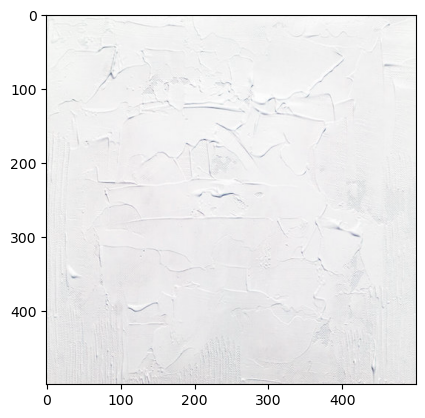

In [49]:
# Reading background image for video
image = cv2.imread('background_images/neutral.jpg')
# changing b,g,r to r,g,b if you are working with colourful images 
# b,g,r = cv2.split(image)
# image = cv2.merge((r,g,b))
plt.imshow(image)

In [50]:
# Creating pairs to connect the respective x,y coordinates of body joints
POSE_PAIRS = [[0,0], [1,2], [1,3], [2,4], [3,5], [4,6], [1,7], [2,8], [7,8], [7,9], [8,10], [9,11], [10,12]]

In [52]:
# Creating VideoWriter object
vid_writer = cv2.VideoWriter('output_00.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 10, (image.shape[1],image.shape[0]))

  0%|          | 0/51 [00:00<?, ?it/s]

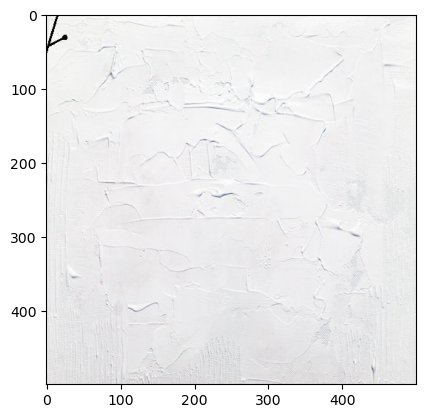

In [53]:
# To add a nice loading bar
from tqdm.notebook import tqdm

# Drawing the skeleton out of lines and points
for ij in tqdm(range(0,df.shape[0])):
    
    # Reading background image for video
    image = cv2.imread('background_images/neutral.jpg')
#     b,g,r = cv2.split(image)
#     image = cv2.merge((r,g,b))
    plt.imshow(image)

    # Creating a tuple and a list to read coordinates from dataframe
    coor = ()
    points = []
    
    # Storing coordinates in the list points
    for i in range(0,25,2):
        coor = (int(df.iloc[ij,i]),) + (int(df.iloc[ij,i+1]),)
        points.append(coor)

    # Generating AI boody
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(image, points[partA], points[partB], (0), 2, lineType = 8)
            cv2.circle(image, points[partA], 3, (0), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(image, points[partB], 3, (0), thickness=-1, lineType=cv2.FILLED)
    
    # Showing generated frames
    plt.imshow(image)

    # Writing frames to vid_writer object
    vid_writer.write(image)

# Releasing Final video
vid_writer.release()